In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('../data/gov_banking_data.csv')

In [54]:
def am_hello():
    print('Hello, from Abdulmalik!')

/tmp/ipykernel_24695/43371484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  byfamily["الفئة_العمرية"][index] = modify_arabic_display(byfamily["الفئة_العمرية"][index])
/tmp/ipykernel_24695/43371484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  byfamily["الحالة_الاجتماعية"][index] =  modify_arabic_display(byfamily["الحالة_الاجتماعية"][index])


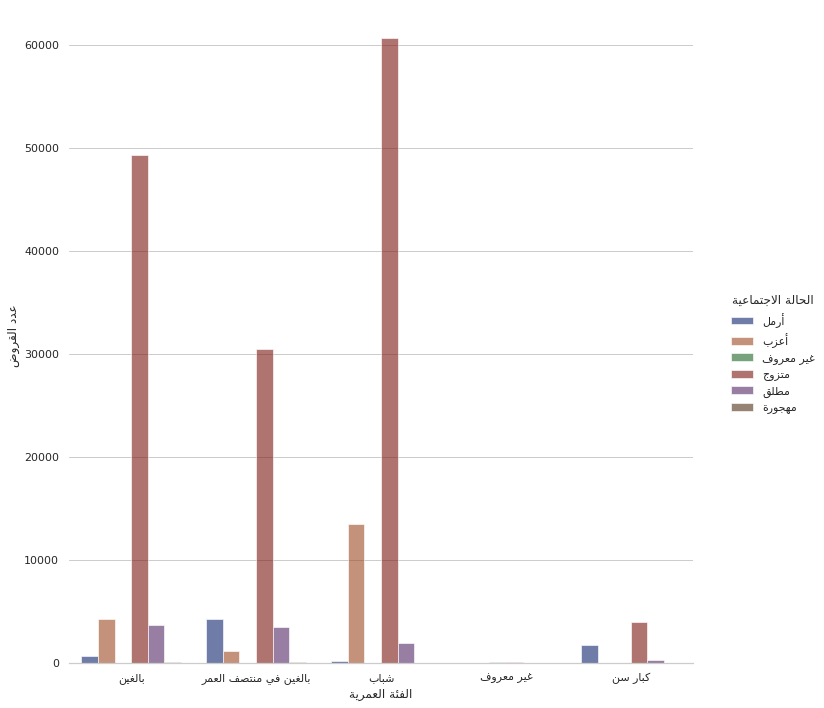

In [55]:
byfamily = pd.DataFrame( data.groupby(['الفئة_العمرية' , 'الحالة_الاجتماعية']).size().reset_index(name='عدد القروض') )

if byfamily["الفئة_العمرية"][0]=="بالغين" :
        for index, row in byfamily.iterrows():
   
            byfamily["الفئة_العمرية"][index] = modify_arabic_display(byfamily["الفئة_العمرية"][index])
        # print( modify_arabic_display(byfamily["الفئة_العمرية"][index]))
            byfamily["الحالة_الاجتماعية"][index] =  modify_arabic_display(byfamily["الحالة_الاجتماعية"][index])
sns.set_theme(style="whitegrid")

penguins = byfamily
# res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in byfamily.items()}

# df = pd.DataFrame(res2.items(), columns=['الفئة_العمرية', 'الحالة_الاجتماعية' , 'عدد_القروض'] )

# Draw a nested barplot by species and sex

g = sns.catplot(
    data=byfamily, kind="bar",
    x="الفئة_العمرية", y="عدد القروض", hue="الحالة_الاجتماعية",
    ci="sd", palette="dark", alpha=.6, height=10
    
)
legends = modify_arabic_display('الحالة الاجتماعية')
Xaxis=  modify_arabic_display('الفئة العمرية')
Yaxis =  modify_arabic_display('عدد القروض')
g.despine(left=True)
g.set_axis_labels(Xaxis, Yaxis)
g.legend.set_title(modify_arabic_display('الحالة الاجتماعية'))



In [56]:

def modify_arabic_display(s):
    return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

/tmp/ipykernel_24695/1638167685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toSectopn["قطاع_العميل"][index] = modify_arabic_display(toSectopn["قطاع_العميل"][index])
/tmp/ipykernel_24695/1638167685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toSectopn["جنس_العميل"][index] =  modify_arabic_display(toSectopn["جنس_العميل"][index])


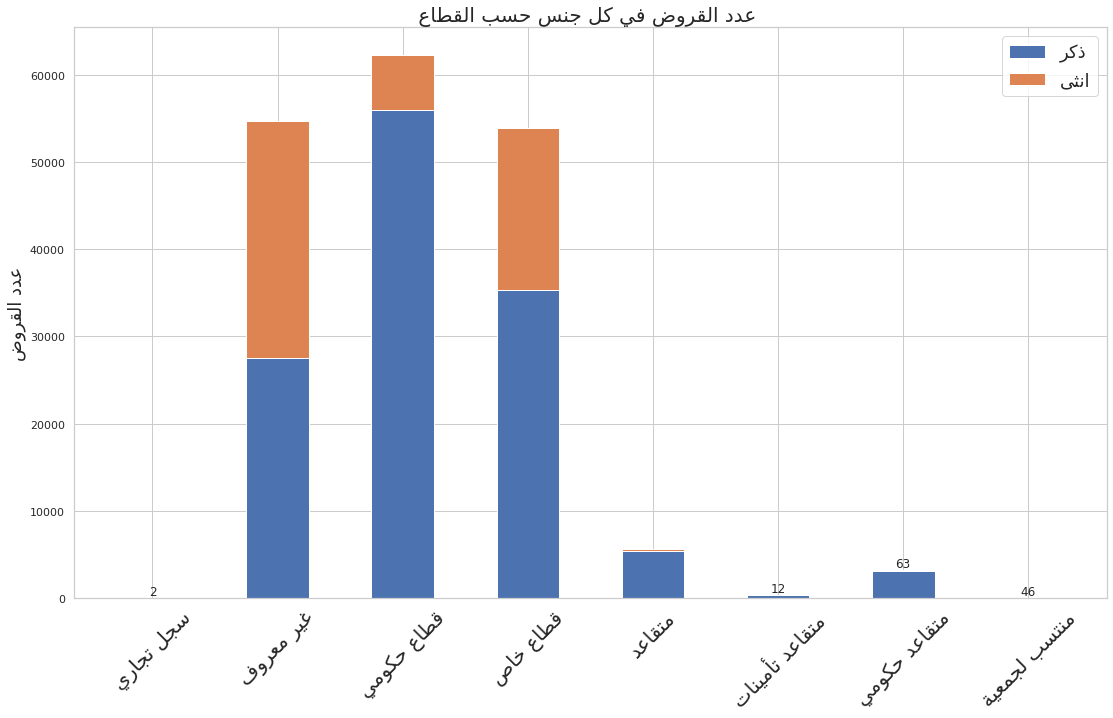

In [57]:
toSectopn = data.groupby(["قطاع_العميل" , 'جنس_العميل'])['قيمة_التمويل'].count().reset_index(name='عدد القروض') 
if toSectopn["قطاع_العميل"][0] =='سجل تجاري':
        for index, row in toSectopn.iterrows():
   
                toSectopn["قطاع_العميل"][index] = modify_arabic_display(toSectopn["قطاع_العميل"][index])
       
                toSectopn["جنس_العميل"][index] =  modify_arabic_display(toSectopn["جنس_العميل"][index])

fig, ax = plt.subplots()
a= list(toSectopn["قطاع_العميل"].unique())

b = list(toSectopn[toSectopn["جنس_العميل"] == "ﺮﻛﺫ"]["عدد القروض"])
b.insert(0,0)
c = list(toSectopn[toSectopn["جنس_العميل"] == "ﻰﺜﻧﺃ"]["عدد القروض"])
c.append(0)

fig.set_size_inches(18.5, 10.5)

ax.bar(a, b, 0.5  , label=modify_arabic_display("ذكر") )
ax.bar(a,  c, 0.5 , bottom=b,
       label=modify_arabic_display('انثى'))
plt.tick_params(axis='x', which='major', labelsize=20)
for c in ax.containers:
    # Filter the labels
    labels = [v if(( v > 1 ) & ( v < 100 ) )else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels)
    
ax.set_ylabel(modify_arabic_display('عدد القروض') ,  fontsize = 18)
ax.set_title(modify_arabic_display("  عدد القروض في كل جنس حسب القطاع " ) , fontsize = 20)
ax.legend(fontsize = 18)
plt.xticks(rotation=45)
plt.show()

In [58]:
toSectopn[toSectopn["جنس_العميل"] == "ﻰﺜﻧﺃ"]

,قطاع_العميل,جنس_العميل,عدد القروض
0,ﻱﺭﺎﺠﺗ ﻞﺠﺳ,ﻰﺜﻧﺃ,2
1,ﻑﻭﺮﻌﻣ ﺮﻴﻏ,ﻰﺜﻧﺃ,27146
4,ﻲﻣﻮﻜﺣ ﻉﺎﻄﻗ,ﻰﺜﻧﺃ,6319
6,ﺹﺎﺧ ﻉﺎﻄﻗ,ﻰﺜﻧﺃ,18505
8,ﺪﻋﺎﻘﺘﻣ,ﻰﺜﻧﺃ,227
10,ﺕﺎﻨﻴﻣﺄﺗ ﺪﻋﺎﻘﺘﻣ,ﻰﺜﻧﺃ,12
12,ﻲﻣﻮﻜﺣ ﺪﻋﺎﻘﺘﻣ,ﻰﺜﻧﺃ,63
